# Project: Optimize KNN model for prediction of cars' market price

## Content
- [Introduction](#intro)
- [Objective](#obj)
- [Data cleaning](#clean)
- [Model optimization](#model)
- [Conclusion](#conclude)

<a id='intro'></a>
## Introduction

This project aims at understanding fundamentals of machine learning using the k-nearest neighbors (KNN) algorithm. Automobile data set is used for predicting car's market price from various attributes.

The description of attrubutes and data file can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile)

<a id='obj'></a>
## Objective

The objective of this project is to optimize number of features and number of neighbors of the KNN models by mean of Root Mean Squared Error (RMSE) minimization.

<a id='clean'></a>
## Data cleaning

First step of machine learning process is to assess and clean data to make data analysis precise and efficient. In this section, missing values are handled, data types are corrected, and numeric features are normalized.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data from file
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = col_names)

# visually assess the dataframe
pd.set_option('display.max_columns', 30) # set show option
pd.set_option('display.max_rows', 300) # set show option
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
# information of the dataframe
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [4]:
# statistics of the numeric attributes
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Issues found:
- '?' in some columns has no meaning. This should be missing value.
- `bore`, `stroke`, `horsepower`, `peak-rpm` and `price` should be numeric type.

In [5]:
# create new dataframe for cleaning
clean_cars = cars.copy()

- clean `normalized-losses` column

In [6]:
# replace '?' with NaN
clean_cars['normalized-losses'] = clean_cars['normalized-losses'].replace('?',np.nan)

# correct data type
clean_cars['normalized-losses'] = clean_cars['normalized-losses'].astype(float)

# check numbers of missing values in normalized-losses column
miss = clean_cars['normalized-losses'].isnull().sum()

print('{} out of 205 rows contain missing values'.format(miss))

41 out of 205 rows contain missing values


Because the number of rows that have a missing value is large, dropping out the entire missing rows is not a good idea. Let's replace the missing values with average value of the column.

In [7]:
# calculate avarage value of normalized-losses column
norm_mean = clean_cars['normalized-losses'].mean()

# fill missing values with the average value
clean_cars['normalized-losses'].fillna(norm_mean,inplace=True)

- clean `num-of-doors` column

In [8]:
# check number of missing value in the column
clean_cars['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Since the missing value (?) is only 2 and the attribute is not numeric, let's remove them.

In [9]:
# remove rows that have missing value in 'num-of-doors' column
clean_cars.drop(clean_cars.index[clean_cars['num-of-doors']=='?'], axis = 0, inplace = True)

# test that ? was removed
clean_cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

- clean `bore` column

In [10]:
# check number of missing value in the column
(clean_cars['bore']=='?').sum()

4

Let's replace '?' with NaN, change type to numeric, and replace NaN with average value

In [11]:
# replace '?' with NaN
clean_cars['bore'] = clean_cars['bore'].replace('?',np.nan)

# correct data type
clean_cars['bore'] = clean_cars['bore'].astype(float)

# calculate avarage value of bore column
bore_mean = clean_cars['bore'].mean()

# fill missing values with the average value
clean_cars['bore'].fillna(bore_mean,inplace=True)

- clean `stroke` column

In [12]:
# check number of missing value in the column
(clean_cars['stroke']=='?').sum()

4

Clean this column in similar manner as `bore`

In [13]:
# replace '?' with NaN
clean_cars['stroke'] = clean_cars['stroke'].replace('?',np.nan)

# correct data type
clean_cars['stroke'] = clean_cars['stroke'].astype(float)

# calculate avarage value of stroke column
stroke_mean = clean_cars['stroke'].mean()

# fill missing values with the average value
clean_cars['stroke'].fillna(stroke_mean,inplace=True)

- clean the other columns; `horsepower`, `peak-rpm` and `price` similarly to `bore` and `stroke`

In [14]:
# replace '?' with NaN
clean_cars[['horsepower','peak-rpm','price']] = clean_cars[['horsepower','peak-rpm','price']].replace('?',np.nan)

# correct data type
clean_cars[['horsepower','peak-rpm','price']] = clean_cars[['horsepower','peak-rpm','price']].astype(float)

# calculate avarage value of stroke column
horse_mean = clean_cars['horsepower'].mean()
peak_mean = clean_cars['peak-rpm'].mean()
price_mean = clean_cars['price'].mean()

# fill missing values with the average value
clean_cars['horsepower'].fillna(horse_mean,inplace=True)
clean_cars['peak-rpm'].fillna(peak_mean,inplace=True)
clean_cars['price'].fillna(price_mean,inplace=True)

In [15]:
# test that NaN is filled and datatype are correct
clean_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized-losses    203 non-null float64
make                 203 non-null object
fuel-type            203 non-null object
aspiration           203 non-null object
num-of-doors         203 non-null object
body-style           203 non-null object
drive-wheels         203 non-null object
engine-location      203 non-null object
wheel-base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb-weight          203 non-null int64
engine-type          203 non-null object
num-of-cylinders     203 non-null object
engine-size          203 non-null int64
fuel-system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression-rate     203 non-null float64
horsepower           203 non-

In [16]:
# test if there are no more missing values remain
(clean_cars.values == '?').sum()

0

Normalize the numeric columns so all values range from 0 to 1.

In [17]:
# statistics of the numeric attributes
clean_cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.467662,5125.870647,25.172414,30.699507,13242.613065
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.271327,0.314858,3.888216,39.612357,477.438880,6.529812,6.874645,7898.956366
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
# specify columns to normalize
norm_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',]

# normalize the dataframe
norm_cars = clean_cars.copy()
norm_cars[norm_columns] = norm_cars[norm_columns].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [19]:
# check the statistics of the normalized dataframe
norm_cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.567488,0.297759,0.355139,0.492736,0.467939,0.494294,0.415018,0.249335,0.564968,0.563843,0.193325,0.235282,0.398315,0.338123,0.386829,13242.613065
std,0.250004,0.166412,0.176122,0.184166,0.179189,0.203544,0.202699,0.157725,0.193805,0.149932,0.243013,0.165051,0.194873,0.181384,0.180912,7898.956366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.188482,0.230321,0.379851,0.316667,0.350000,0.254849,0.135849,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,7781.500000
50%,0.600000,0.298429,0.303207,0.479104,0.433333,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,10595.000000
75%,0.800000,0.376963,0.460641,0.629851,0.550000,0.641667,0.564585,0.309434,0.746429,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


<a id='model'></a>
## Model Optimization


Create a function, named `knn_train_test()` that encapsulates the training and simple validation process for K-nearest neigbor algoritm.

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(col_names,taget_name,df,k=5):
    
    # use the KNeighborsRegressor to instantiate an empty model for K-Nearest Neighbors
    knn = KNeighborsRegressor(n_neighbors = k)
    
    # randomize order of rows in data frame
    np.random.seed(1234)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split train and test sets
    n = int(0.7*df.shape[0])
    df_train = rand_df.iloc[:n] 
    df_test = rand_df.iloc[n:]
    X_train = df_train[col_names]
    y_train = df_train[target_name]
    X_test = df_test[col_names]
    y_test = df_test[target_name]
    
    # use the fit method to fit the K-Nearest Neighbors model to the data
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    
    # calculate rmse using sklearn
    mse = mean_squared_error(predictions,y_test)
    rmse = mse**0.5
    
    return rmse

In [21]:
# select features for the predictions
col_names = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',]
target_name = 'price'

#### Testing univariate models using the different numeric columns in the data set.

In [22]:
# try each numerical variable one by one with default k (k=5)
rmse1 = {}
for col_name in col_names:
    rmse1[col_name] = knn_train_test([col_name],target_name,norm_cars)

rmse1 = pd.Series(rmse1)
print(rmse1.sort_values())

engine-size          4085.111027
curb-weight          4286.427561
highway-mpg          4602.363636
width                5322.108659
horsepower           5364.246642
length               5410.454350
city-mpg             5726.457014
compression-rate     6907.341643
wheel-base           6944.068247
normalized-losses    7933.141375
stroke               8213.482963
bore                 8248.845434
symboling            8454.216190
peak-rpm             8507.770834
height               9030.594821
dtype: float64


Using default k (k=5), `engine-size` column performed the best.

In [23]:
# find rmse for each univariate variable and k
k_val = [1, 3, 5, 7, 9]
rmse2 = {}

for col_name in col_names:
    rmse2[col_name] = {}
    for k in k_val:
        rmse2[col_name][k] = knn_train_test([col_name],target_name,norm_cars,k)
        
# show the result
rmse2

{'symboling': {1: 10596.651686280844,
  3: 9255.941652636393,
  5: 8454.216190110455,
  7: 8442.9000982563,
  9: 8499.537243264107},
 'normalized-losses': {1: 8375.03790963956,
  3: 8497.932357583702,
  5: 7933.141374836543,
  7: 8257.746541323546,
  9: 8261.809297176345},
 'wheel-base': {1: 4702.82997461585,
  3: 6562.42859372176,
  5: 6944.068247435985,
  7: 7064.932212367253,
  9: 7049.836179024342},
 'length': {1: 6019.831423939473,
  3: 5960.554003658467,
  5: 5410.4543496696115,
  7: 5679.700877340717,
  9: 5906.172880099481},
 'width': {1: 5215.90213354412,
  3: 5457.9818500169395,
  5: 5322.10865937877,
  7: 5403.097488349786,
  9: 5501.6637669795855},
 'height': {1: 9440.613211807646,
  3: 9192.107426910557,
  5: 9030.594820769951,
  7: 8910.216675854183,
  9: 9018.101843470087},
 'curb-weight': {1: 5912.9437175629055,
  3: 5302.748845633894,
  5: 4286.427560834027,
  7: 4388.798959403001,
  9: 4578.3445648318},
 'engine-size': {1: 4634.776286186612,
  3: 4122.965096637476,
  

In [24]:
# average rmse of each feature across k values
mean_rmse = {}
for col_name in col_names:
    rmse_list = []
    for k in k_val:
        rmse_list.append(rmse2[col_name][k])
    mean_rmse[col_name] = np.mean(rmse_list)

mean_rmse = pd.Series(mean_rmse)
print(mean_rmse.sort_values())

engine-size          4161.108542
highway-mpg          4582.234454
curb-weight          4893.852730
width                5380.150780
horsepower           5453.445699
city-mpg             5676.000294
length               5795.342707
wheel-base           6464.819041
compression-rate     7153.842917
bore                 7768.202231
normalized-losses    8265.133496
stroke               8539.472837
peak-rpm             8684.953100
symboling            9049.849374
height               9118.326796
dtype: float64


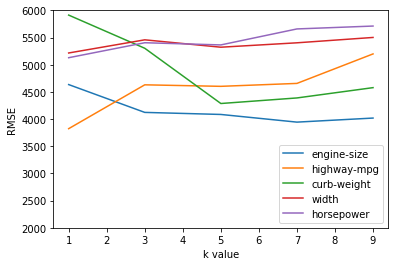

In [25]:
# visualize k value vs rmse of the best 5 features
best_5 = ['engine-size','highway-mpg','curb-weight','width','horsepower']

for col in best_5:
    rmse_plot = list(rmse2[col].values())
    plt.plot(k_val,rmse_plot)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.ylim(2000,6000)
plt.legend(best_5,loc='lower right')
plt.show()

#### Testing mutivariate model using multiple columns in the dataset.
- Using the best 2 features (`engine-size` and `highway-mpg`)
- Using the best 3 features (`engine-size`, `highway-mpg` and `curb-weight`)
- Using the best 4 features (`engine-size`, `highway-mpg`, `curb-weight` and `width`)
- Using the best 5 features (`engine-size`, `highway-mpg`, `curb-weight`, `width` and `horsepower`)

Using the default k value and compute RMSE value of each model.

In [26]:
# specify the best features
best_dict = {'best_2' : ['engine-size','highway-mpg'],
        'best_3' : ['engine-size','highway-mpg','curb-weight'],
        'best_4' : ['engine-size','highway-mpg','curb-weight','width'],
        'best_5' : ['engine-size','highway-mpg','curb-weight','width','horsepower']}

rmse3 = {}
for best in best_dict:
    col_names = best_dict[best]
    rmse3[best]= knn_train_test(col_names,target_name,norm_cars)
        
# show the result
rmse3

{'best_2': 3961.2079525981612,
 'best_3': 3306.7973832879966,
 'best_4': 4481.57864076349,
 'best_5': 4337.32768355887}

The 3-features model gives the lowest RMSE value at defualt k value. Let's compute RMSE across k values for each model.

Let's vary k value from 1 to 25 and see which is the optimal k that minimize RMSE of each model. 

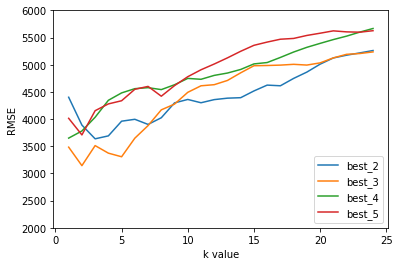

In [27]:
rmse4 = {}
k_var = range(1,25)
for best in best_dict:
    col_names = best_dict[best]
    rmse4[best] = {}
    for k in k_var:
        rmse4[best][k] = knn_train_test(col_names,target_name,norm_cars,k)
        
# visualize the result
for best in best_dict:
    rmse_plot = list(rmse4[best].values())
    plt.plot(k_var,rmse_plot)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.ylim(2000,6000)
plt.legend(best_dict.keys(),loc='lower right')
plt.show()

<a id='conclude'></a>
## Conclusion

This project has been done following the machine learning workflow. The model optimization was done on a basis of RMSE minimization. Evaluation of features was carried out using univariate variable model to seek for the best features. Thereafter, The best features were employed in the multivariate variables model. Number of the nearest neighbors (k) is the optimized hyperparameter. To summarize, the result shows that the best KNN model is the one with 3 features including `engine-size`, `highway-mpg` and `curb-weight`. The optimal k for this model is 2.